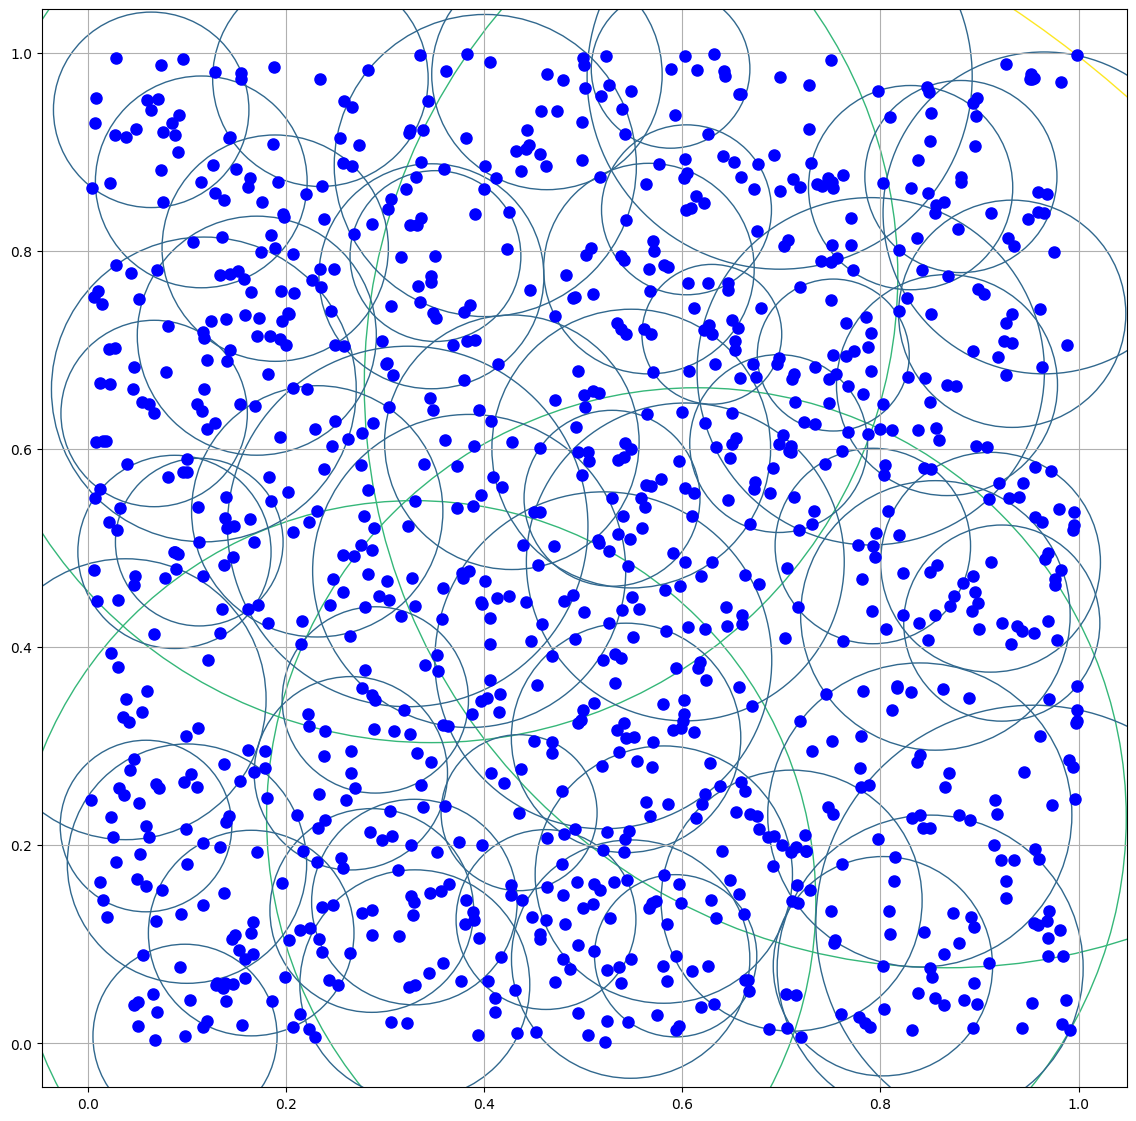

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re

cmap = plt.cm.viridis

# Function to parse the custom data format
def parse_data(row):
    p_match = re.search(r'p:\(([^)]+)\)', row)
    h_match = re.search(r'h:(\d+)', row)
    n_match = re.search(r'n:(\d+)', row)
    cr_match = re.search(r'cr:(\d+.\d+)', row)
    if (not cr_match):
        cr_match = re.search(r'cr:(\d+)', row)

    if not (p_match and h_match and cr_match and n_match):
        return None  # Return None if any patterns do not match
    
    p = tuple(map(float, p_match.group(1).split(',')))
    h = int(h_match.group(1))
    cr = float(cr_match.group(1))
    n = int(n_match.group(1))
    return p, h, cr, n

# Read the CSV file
df = pd.read_csv('mtree_cp_1024.csv', header=None, delimiter=";")

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 14))

# Find min and max h values for normalization
min_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).min()
max_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).max()
norm = mcolors.Normalize(vmin=min_h, vmax=max_h)

# Process each row in the DataFrame
for index, row in df.iterrows():
    result = parse_data(row[0])
    if result:
        p, h, cr, n = result

        if n == 0:
            markersize = 8
            ax.plot(p[0], p[1], 'bo', markersize=markersize)
        else:
            color = cmap(norm(h))
            circle = plt.Circle(p, cr, color=color, fill=False)  # Draw a red circle for n!=0
            ax.add_artist(circle)

# Set equal scaling by setting the aspect ratio to 'equal'
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
plt.show()
